In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('hotel_bookings.csv',header=0)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
df.shape

(119390, 32)

In [5]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [6]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [7]:
df['target']=np.where(df['is_canceled'].isin(['1']),1,0) 

In [8]:
df['target'].mean()

0.37041628277075134

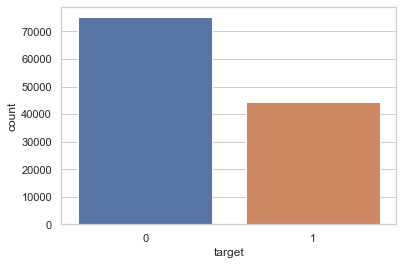

In [9]:
sns.countplot(x='target',data=df)
plt.show()

In [10]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
nan_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
df["meal"].replace("Undefined", "SC", inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

hotel - It doesn't matter which type of hotel they make a reservation, the main objective is to see if they make ANY type of reservation at all or not
agent - The agent that got the reservation for us won't matter
company - Same logic goes for company as for the agent
reservation_status_date - We have other features (like: arrival_date_week_number, arrival_date_day_of_month etc) that gives us the same information

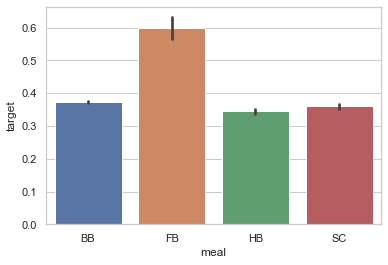

In [13]:
from numpy import mean
ax = sns.barplot(x="meal", y="target", data=df, estimator=mean)

In [14]:
df.groupby('country')['target'].mean()

country
ABW        0.000000
AGO        0.566298
AIA        0.000000
ALB        0.166667
AND        0.714286
ARE        0.843137
ARG        0.252336
ARM        0.250000
ASM        0.000000
ATA        0.000000
ATF        0.000000
AUS        0.251174
AUT        0.182106
AZE        0.529412
BDI        0.000000
BEL        0.202391
BEN        1.000000
BFA        0.000000
BGD        0.750000
BGR        0.160000
BHR        0.800000
BHS        0.000000
BIH        0.230769
BLR        0.346154
BOL        0.000000
BRA        0.373201
BRB        0.000000
BWA        0.000000
CAF        0.000000
CHE        0.247399
             ...   
SMR        0.000000
SRB        0.029703
STP        0.000000
SUR        0.000000
SVK        0.369231
SVN        0.263158
SWE        0.221680
SYC        0.500000
SYR        0.000000
TGO        0.000000
THA        0.305085
TJK        0.888889
TMP        0.333333
TUN        0.487179
TUR        0.411290
TWN        0.274510
TZA        0.600000
UGA        0.000000
UKR        0

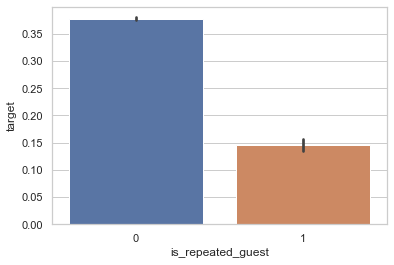

In [15]:
from numpy import mean
ax = sns.barplot(x="is_repeated_guest", y="target", data=df, estimator=mean)

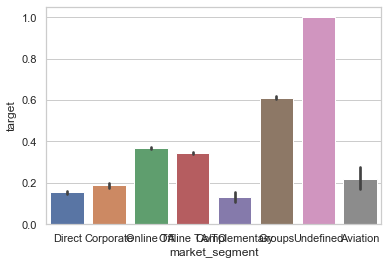

In [16]:
from numpy import mean
ax = sns.barplot(x="market_segment", y="target", data=df, estimator=mean)

In [17]:
df.groupby('market_segment')['target'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: target, dtype: int64

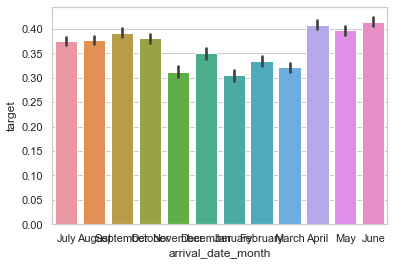

In [18]:
from numpy import mean
ax = sns.barplot(x="arrival_date_month", y="target", data=df, estimator=mean)

In [19]:
df.groupby('arrival_date_month')['target'].mean()

arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: target, dtype: float64

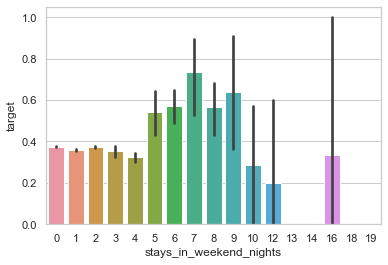

In [20]:
from numpy import mean
ax = sns.barplot(x="stays_in_weekend_nights", y="target", data=df, estimator=mean)

In [21]:
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: target, dtype: float64

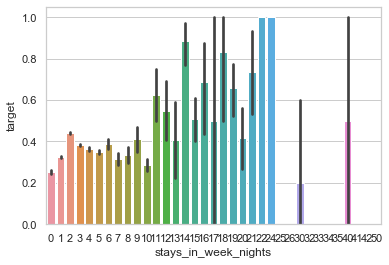

In [22]:
from numpy import mean
ax = sns.barplot(x="stays_in_week_nights", y="target", data=df, estimator=mean)

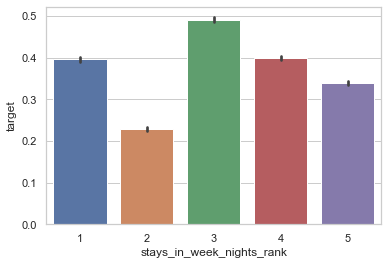

In [23]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="stays_in_week_nights_rank",y="target",data=df,estimator=mean)

In [24]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1    0
2    1
3    2
4    2
5    4
Name: stays_in_week_nights, dtype: int64

In [25]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
1    0.312170
2    0.444510
3    0.338722
Name: target, dtype: float64

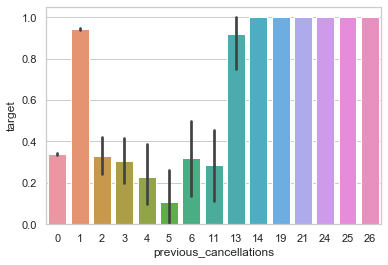

In [26]:
from numpy import mean
ax = sns.barplot(x="previous_cancellations", y="target", data=df, estimator=mean)

In [27]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [28]:
df['prev_cancel_ind']=np.where(df['previous_cancellations'].isin(['0']),0,1)
df.groupby('prev_cancel_ind')['target'].count()

prev_cancel_ind
0    112906
1      6484
Name: target, dtype: int64

In [29]:
df.groupby('booking_changes')['target'].mean()

booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: target, dtype: float64

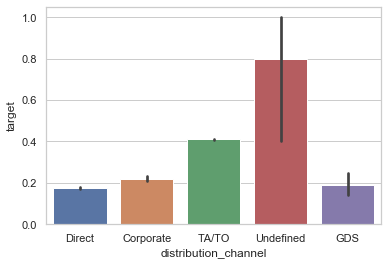

In [30]:
from numpy import mean
ax = sns.barplot(x="distribution_channel", y="target", data=df, estimator=mean)

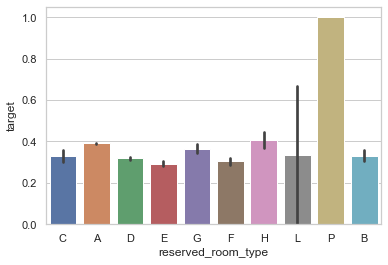

In [31]:
from numpy import mean
ax = sns.barplot(x="reserved_room_type", y="target", data=df, estimator=mean)

In [32]:
df.groupby('reserved_room_type')['target'].count()

reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: target, dtype: int64

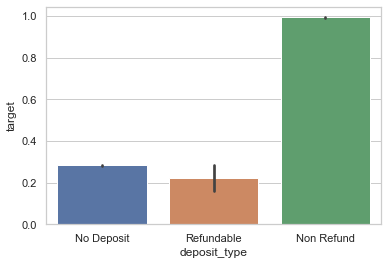

In [33]:
from numpy import mean
ax = sns.barplot(x="deposit_type", y="target", data=df, estimator=mean)

In [34]:
df.groupby('deposit_type')['target'].count()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: target, dtype: int64

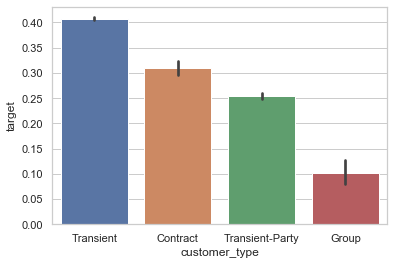

In [35]:
from numpy import mean
ax = sns.barplot(x="customer_type", y="target", data=df, estimator=mean)

In [36]:
df.groupby('customer_type')['target'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: target, dtype: int64

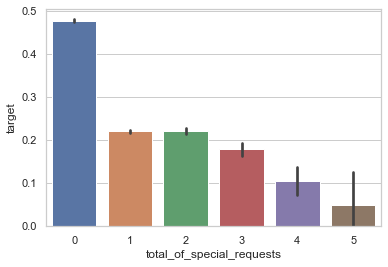

In [37]:
from numpy import mean
ax = sns.barplot(x="total_of_special_requests", y="target", data=df, estimator=mean)

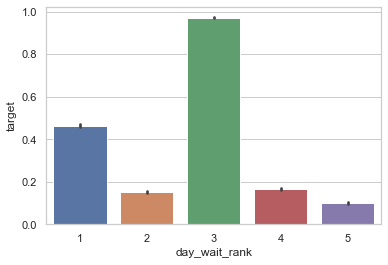

In [38]:
df['day_wait_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="day_wait_rank",y="target",data=df,estimator=mean)

In [39]:
df['day_wait_ind']=np.where(df['day_wait_rank'].isin(['3']),1,0)
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    95512
1    23878
Name: target, dtype: int64

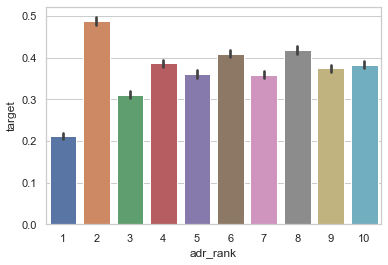

In [40]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="adr_rank",y="target",data=df,estimator=mean)

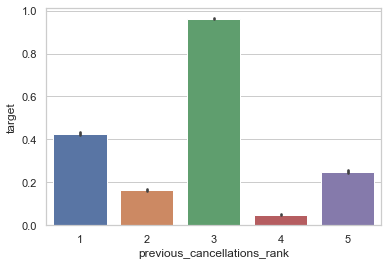

In [41]:
df['previous_cancellations_rank']=pd.qcut(df['previous_cancellations'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="previous_cancellations_rank",y="target",data=df,estimator=mean)

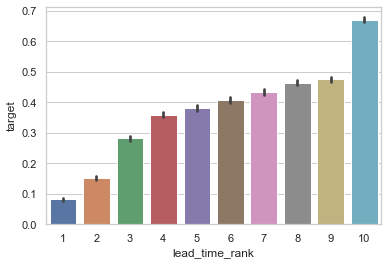

In [42]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="lead_time_rank",y="target",data=df,estimator=mean)

In [43]:
df.groupby('lead_time_rank')['lead_time'].min()

lead_time_rank
1       0
2       3
3      11
4      26
5      45
6      69
7      99
8     138
9     184
10    265
Name: lead_time, dtype: int64

In [44]:
dep=['target']
col_num= ['lead_time','adr']   
         
col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment',
          'prev_cancel_ind','stay_in_week_night_grp']

In [45]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [46]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [47]:
X_var=X_all
Y_var=df['target']

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 7)
rf_1000.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [50]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.88


In [51]:
y_pred_RF=rf_1000.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.88


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21905   466]
 [ 3970  9476]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22371
           1       0.98      0.69      0.81     13446

    accuracy                           0.88     35817
   macro avg       0.91      0.84      0.86     35817
weighted avg       0.89      0.88      0.87     35817



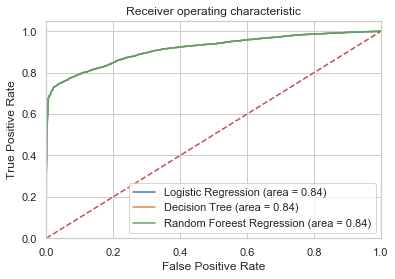

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Predictions from the models

In [55]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].min()

P_Rank
1     0.001069
2     0.054735
3     0.082862
4     0.117018
5     0.149177
6     0.201432
7     0.249455
8     0.377061
9     0.952150
10    0.982824
Name: y_pred_P, dtype: float64

In [56]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['target'].sum()

P_Rank_dtree
1       405
2       722
3       944
4      1697
5      1909
6      3540
7      2388
8      8777
9     11913
10    11929
Name: target, dtype: int32

In [57]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['target'].sum()

P_Rank_rf
1       401
2       666
3      1031
4      1083
5      1889
6      2815
7      3236
8      9386
9     11788
10    11929
Name: target, dtype: int32

In [58]:
df.head()
df.to_csv('hotel_demand_prediction_scored_file.csv')